In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from nltk.sentiment.vader import SentimentIntensityAnalyzer

import nltk
nltk.downloader.download('vader_lexicon')

pd.set_option('display.max_colwidth', None)
pd.options.mode.chained_assignment = None

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

df = pd.read_csv("gdrive/My Drive/Dissertation Complete/college_confidential_NE.csv")

Mounted at /content/gdrive


In [ ]:
df.head()

,content,university
0,"Hi ! First of all, I think your choice should depend on WHAT you want to do in your life. I have a hard time seeing how a pre-business economics major at UCLA is useful if you want to go into the law field. What you have at USC seems more relevant to your interest if your interest is indeed something related to law. As for the their locations, UCLA is in a far better neighborhood than USC. They both are in Los Angeles, but Los Angeles is a very big city. USC is located in not a very good nor safe neighborhood. The area outside USC is not at all safe. But if you're ON campus, then you're safe. You should only go off campus if you have to in the mornings and NOT be wandering outside campus late. Both universities have big and small classes, but I think I would have to give it to USC on this one as I think it has slightly smaller class sizes relative to UCLA. Both compete with each other, but they both are the same in terms of reputation purely based on facts. IMO through, I would say USC has a slight advantage. As for the stereotype that USC is a party school for rich kids, imo kinda true. USC is doing a lot of good stuff as the NY Times article points out. The rich kids thing is kinda true though. Nearly everyone where I live says it. But party school, yes but not more or less than other schools. However, this whole stereotype does not really have an impact. People on campus generally seem to be very open and friendly and caring towards everyone. And generally, people on campus are damn smart. I've always felt that USC has a slightly more intellectual aura. Another factor to be considering is the networking. USC is known for its great alumni network and help with job/internship opportunities. On a personal note, I got admitted to USC. I've narrowed it down to USC and 1 other college. I'm still deciding, but hope to see you at USC if I go there. #FightOn! Good luck and congrats for being admitted!!!",UCLA
1,Hi thank you so much for giving such detailed advice!! As I observed the graduate vs undergrad population at UCLA and USC I saw that USC had a significantly larger percentage of grad students. Do you think that this means the schools puts more concentration on graduate education? Or does it mean that undergrads receive more individual attention?,UCLA
2,"USC has a larger # of grad students because it offers more programs for grad students than UCLA. USC UG's receive as much attention and support as they want to receive, and they dont have to worry about potential funding cuts because of financial problems with the state of Calif, if and when they might arise. "" The area outside USC is not at all safe. "" this is BS. The 6 block area north of campus is filled with USC student housing and is within the USC Security patrol area. It is as safe as being on campus Areas east of campus are spotty.",UCLA
3,"USC is a school for rich kids who like to party. I know a couple of people whose parents donated money to get a guaranteed transfer or acceptance even with a sub 3.0 gpa. Yes, it doesn't not apply to all people but some decent number of students did pay their way into USC. Yes, UCLA does have a better reputation in my opinion due to the fact that people don't pay their way in, but it's up to you whether or not you would want to pay more and have more attention at USC or be with your friends and enjoy UCLA's prestige. If it were up to me, I would go to the UC school over USC. Btw the area outside of USC is safe. However, if you drive 5 minutes, you'll will end up in the ghettos.",UCLA
4,"Agree with , a visit is all it takes to make this big decision. Tbh, the decision points being brought up here are so insignificant. At this point in the game, if you are still thinking about whether USC is a party school or the neighborhood is bad - you are very behind in the data you should have by now. Those are rookie aspects that should have been flushed out long ago. Yes, kids from wealthy attend but those kids are also

In [ ]:
vad = SentimentIntensityAnalyzer()

sentiments = []

for text in df['content']:
    sentiment_scores = vad.polarity_scores(text)
    sentiment = sentiment_scores['compound']
    sentiments.append(sentiment)

df['sentiment'] = ['positive' if score > 0 else ('neutral' if score == 0 else 'negative') for score in sentiments]

In [ ]:
df['sentiment'].value_counts()

positive    202348
negative     37795
neutral      18944
Name: sentiment, dtype: int64

In [ ]:
drive.mount('/content/gdrive')
path = '/content/gdrive/My Drive/Dissertation Complete/college_confidential_NE_VADER.csv'

with open(path, 'w') as f:
  df.to_csv(f, encoding='utf-8', index=False, header=True)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df.head()

,content,university,sentiment
0,"Hi ! First of all, I think your choice should depend on WHAT you want to do in your life. I have a hard time seeing how a pre-business economics major at UCLA is useful if you want to go into the law field. What you have at USC seems more relevant to your interest if your interest is indeed something related to law. As for the their locations, UCLA is in a far better neighborhood than USC. They both are in Los Angeles, but Los Angeles is a very big city. USC is located in not a very good nor safe neighborhood. The area outside USC is not at all safe. But if you're ON campus, then you're safe. You should only go off campus if you have to in the mornings and NOT be wandering outside campus late. Both universities have big and small classes, but I think I would have to give it to USC on this one as I think it has slightly smaller class sizes relative to UCLA. Both compete with each other, but they both are the same in terms of reputation purely based on facts. IMO through, I would say USC has a slight advantage. As for the stereotype that USC is a party school for rich kids, imo kinda true. USC is doing a lot of good stuff as the NY Times article points out. The rich kids thing is kinda true though. Nearly everyone where I live says it. But party school, yes but not more or less than other schools. However, this whole stereotype does not really have an impact. People on campus generally seem to be very open and friendly and caring towards everyone. And generally, people on campus are damn smart. I've always felt that USC has a slightly more intellectual aura. Another factor to be considering is the networking. USC is known for its great alumni network and help with job/internship opportunities. On a personal note, I got admitted to USC. I've narrowed it down to USC and 1 other college. I'm still deciding, but hope to see you at USC if I go there. #FightOn! Good luck and congrats for being admitted!!!",UCLA,positive
1,Hi thank you so much for giving such detailed advice!! As I observed the graduate vs undergrad population at UCLA and USC I saw that USC had a significantly larger percentage of grad students. Do you think that this means the schools puts more concentration on graduate education? Or does it mean that undergrads receive more individual attention?,UCLA,positive
2,"USC has a larger # of grad students because it offers more programs for grad students than UCLA. USC UG's receive as much attention and support as they want to receive, and they dont have to worry about potential funding cuts because of financial problems with the state of Calif, if and when they might arise. "" The area outside USC is not at all safe. "" this is BS. The 6 block area north of campus is filled with USC student housing and is within the USC Security patrol area. It is as safe as being on campus Areas east of campus are spotty.",UCLA,negative
3,"USC is a school for rich kids who like to party. I know a couple of people whose parents donated money to get a guaranteed transfer or acceptance even with a sub 3.0 gpa. Yes, it doesn't not apply to all people but some decent number of students did pay their way into USC. Yes, UCLA does have a better reputation in my opinion due to the fact that people don't pay their way in, but it's up to you whether or not you would want to pay more and have more attention at USC or be with your friends and enjoy UCLA's prestige. If it were up to me, I would go to the UC school over USC. Btw the area outside of USC is safe. However, if you drive 5 minutes, you'll will end up in the ghettos.",UCLA,positive
4,"Agree with , a visit is all it takes to make this big decision. Tbh, the decision points being brought up here are so insignificant. At this point in the game, if you are still thinking about whether USC is a party school or the neighborhood is bad - you are very behind in the data you should have by now. Those are rookie aspects that should have been flushed out long ago. Yes, ki

In [ ]:
# Count sentiment types for each uni
sentiment_totals = df.groupby('university')['sentiment'].value_counts().unstack().fillna(0)
sentiment_totals = sentiment_totals.rename_axis([None], axis=1).reset_index()

# convert to int and sort by positive
sentiment_totals[["negative", "neutral", "positive"]] = sentiment_totals[["negative", "neutral", "positive"]].astype('int64')
sentiment_totals = sentiment_totals.sort_values(by=['positive'], ascending=False)

sentiment_totals.head(30)

,university,negative,neutral,positive
8,Harvard,5507,2591,28880
16,Stanford,4313,2202,23637
22,Yale,4300,2288,23613
10,MIT,4255,1930,23486
18,UCLA,3681,1901,17490
12,NYU,2830,1597,15156
5,Columbia,2763,1307,14586
7,Duke,2238,1071,14562
19,UCSD,2382,1199,10302
3,Caltech,1478,688,7242


In [ ]:
sentiment_totals['total'] = sentiment_totals['positive'] + sentiment_totals['negative'] + sentiment_totals['neutral']

sentiment_totals['positive %'] = (sentiment_totals['positive'] / sentiment_totals['total']) * 100
sentiment_totals['negative %'] = (sentiment_totals['negative'] / sentiment_totals['total']) * 100
sentiment_totals['neutral %'] = (sentiment_totals['neutral'] / sentiment_totals['total']) * 100
sentiment_totals = sentiment_totals.round(2)

sentiment_totals = sentiment_totals.reset_index()

sentiment_totals.head()

,university,negative,neutral,positive,total,positive %,negative %,neutral %
8,Harvard,5507,2591,28880,36978,78.10,14.89,7.01
16,Stanford,4313,2202,23637,30152,78.39,14.30,7.30
22,Yale,4300,2288,23613,30201,78.19,14.24,7.58
10,MIT,4255,1930,23486,29671,79.15,14.34,6.50
18,UCLA,3681,1901,17490,23072,75.81,15.95,8.24


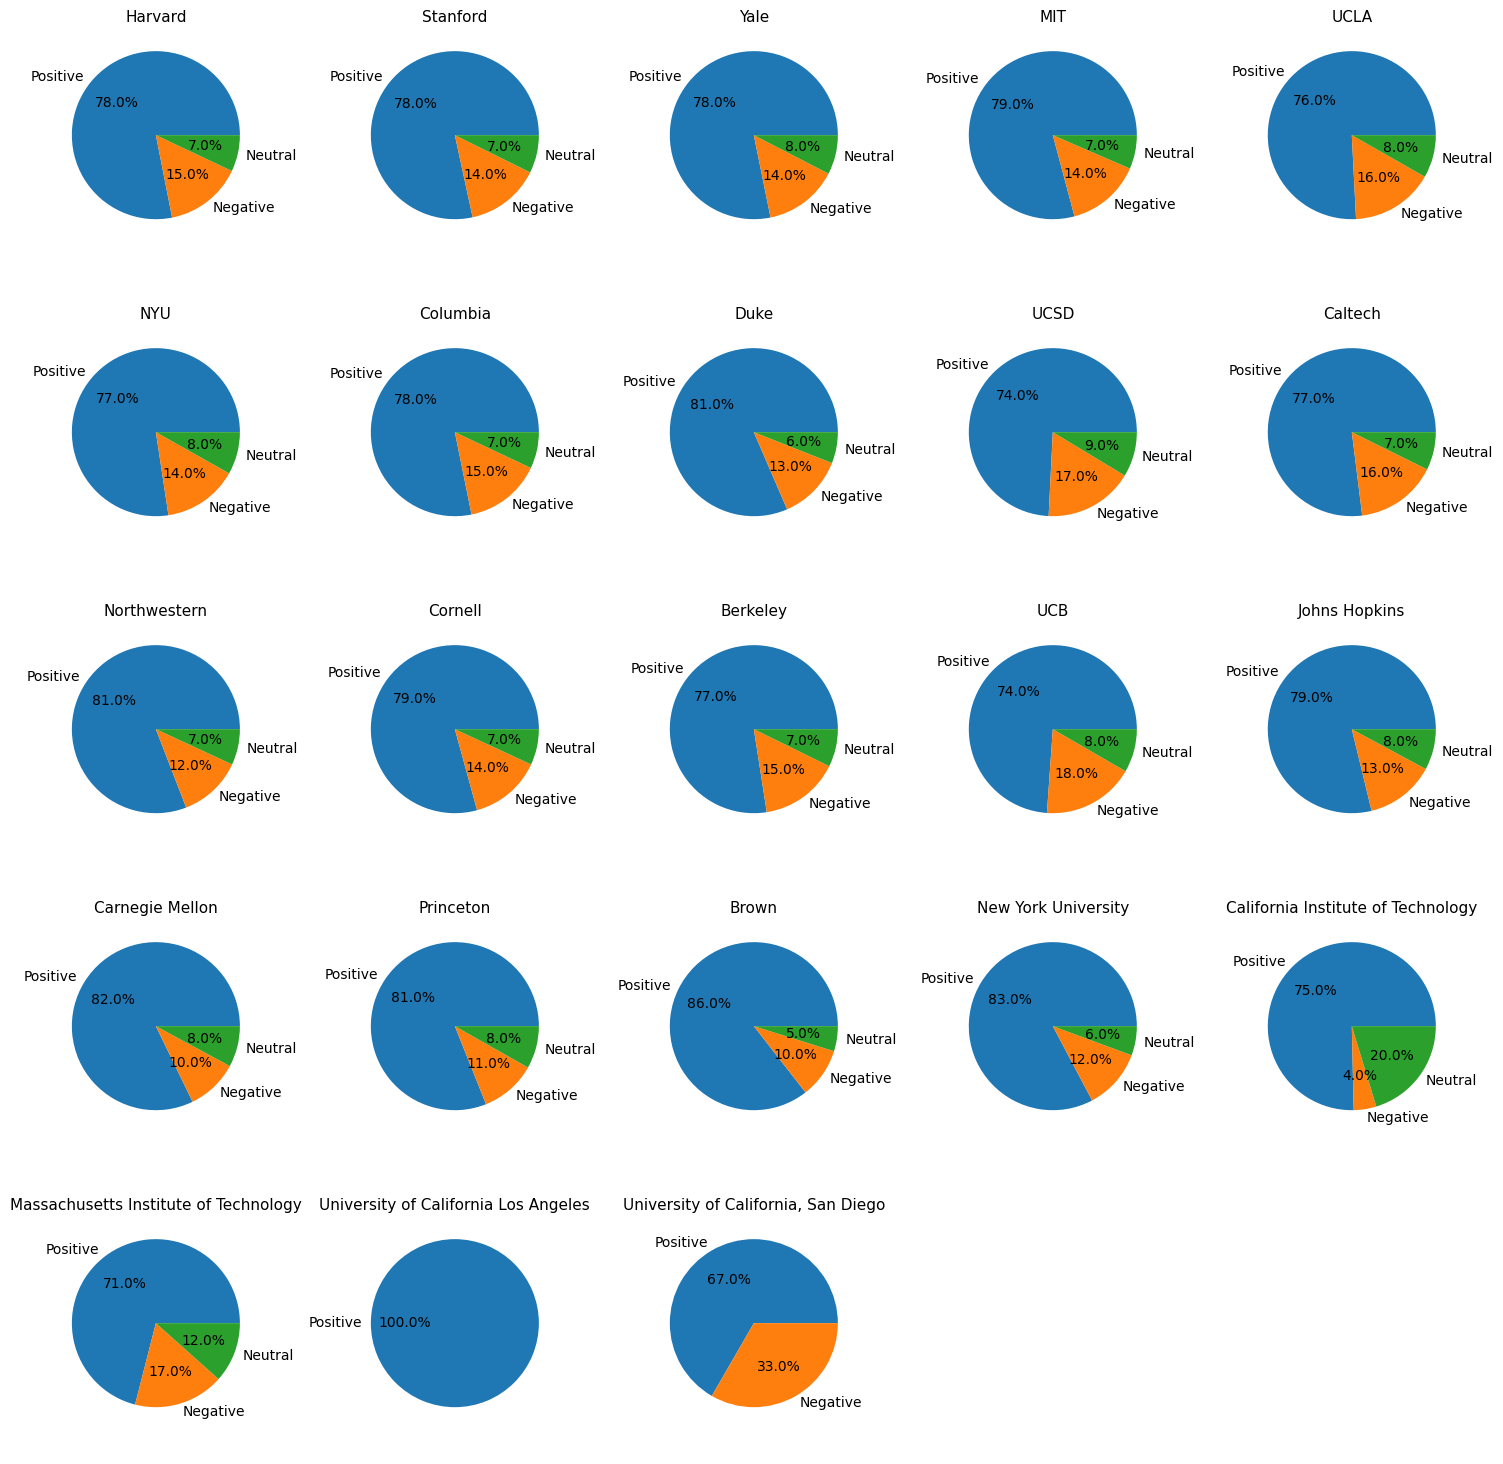

In [ ]:
fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(15, 15))

for uni,ax in zip(sentiment_totals.index, axs.flat):
  uni_name = sentiment_totals['university'].loc[uni]
  pos = sentiment_totals['positive'].loc[uni]
  neg = sentiment_totals['negative'].loc[uni]
  neu = sentiment_totals['neutral'].loc[uni]

  positive = "Positive"
  if pos == 0:
    positive = ""

  neutral = "Neutral"
  if neu == 0:
    neutral = ""

  negative = "Negative"
  if neg == 0:
    negative = ""

  # Plot a pie chart for the sentiments
  ax.pie([pos, neg, neu], labels=[positive, negative, neutral], autopct=lambda p: '{:.1f}%'.format(round(p)) if p > 0 else '')
  ax.set_title(f'{uni_name}', fontsize=11)

axs[4,3].set_axis_off()
axs[4,4].set_axis_off()
fig.tight_layout()

In [ ]:
# Drop all unis with under 100 entries (low sample size)
sentiment_totals = sentiment_totals[sentiment_totals["total"] > 99]

# Sort by positive % in relation to total tweets per uni
sentiment_totals = sentiment_totals.sort_values(by=['positive %'], ascending=False)
sentiment_totals = sentiment_totals.reset_index(drop=True)

sentiment_totals.head()

In [ ]:
final_ratings = sentiment_totals[["university", "positive %"]]

final_ratings.head(30)